In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px
import folium

In [18]:
shp_file = gpd.read_file('UniqueStops/UniqueStops_Fall22.shp')
shp_file.to_file('UniqueStops_Fall22.shp', driver='GeoJSON')
delays_19 = pd.read_csv('Line 19.csv')
delays_20 = pd.read_csv('Line 20.csv')
delays_51A = pd.read_csv('Line 51A.csv')

In [19]:
joined_geom_data_19 = delays_19.merge(shp_file, left_on='stop_code', right_on='stp_511_id', how = 'left')
joined_geom_data_20 = delays_20.merge(shp_file, left_on='stop_code', right_on='stp_511_id', how = 'left')
joined_geom_data_51A = delays_51A.merge(shp_file, left_on='stop_code', right_on='stp_511_id', how = 'left')

In [24]:
joined_geom_data_20

,Unnamed: 0,stop_id,stop_name,stop_code,zone_id,2/12/23 14:59,OBJECTID,stp_identi,stp_511_id,stp_descri,route,geometry
0,0,123,Park St & Otis Dr,57537,E,362.000000,120,0102810,57537,Park St & Otis Dr,20,POINT (-122.24873 37.75731)
1,1,125,Park St & San Jose Av,58895,E,437.500000,122,0102830,58895,Park St & San Jose Av,20 21 663,POINT (-122.24584 37.76080)
2,2,154,2019 Shoreline Dr,57367,E,443.000000,151,0103450,57367,2019 Shoreline Dr,20 663 W,POINT (-122.25837 37.75742)
3,3,158,Willow St & Shoreline Dr,50510,E,448.000000,154,0103500,50510,Willow St & Shoreline Dr,20 663 W,POINT (-122.25664 37.75708)
4,4,160,Alameda South Shore Center & Kohl's,50300,E,443.000000,156,0103600,50300,Alameda South Shore Center & Kohl's,20,POINT (-122.25277 37.75868)
5,5,168,Webster St & Lincoln Av,55549,E,625.666667,160,0103830,55549,Webster St & Lincoln Av,20 78 96 851 W 51A,POINT (-122.27665 37.77549)
6,6,171,Whitehall Pl & Willow St,51145,E,461.000000,163,0103910,51145,Whitehall Pl & Willow St,20,POINT (-122.25483 37.75953)
7,7,173,Willow St & Franciscan Way,57597,E,453.000000,165,0103960,57597,Willow St & Franciscan Way,20 663 W,POINT (-122.25588 37.75838)
8,8,179,Park St & Buena Vista Av,56658,E,687.000000,169,0104170,56658,Park St & Buena Vista Av,20 21 OX,POINT (-122.23983 37.76797)
9,9,18,Central Av & 8th St,54233,E,609.333333,27,0100860,54233,Central Av & 8th St,20 631 663 W,POINT (-122.27325 37.77143)


In [67]:
def filter_for_delays(geom_data):
    geom_data = geom_data[geom_data.iloc[:,5] > 300]
    geom_data.columns.values[5] = "Average Delay"
    geom_data['lon'] = geom_data.geometry.apply(lambda p: p.x)
    geom_data['lat'] = geom_data.geometry.apply(lambda p: p.y)
    
    return geom_data

def generate_map(geom_data):
    filtered_geom_data = filter_for_delays(geom_data)
    fig = px.scatter_mapbox(filtered_geom_data,
                    lat='lat',
                    lon='lon',
                    zoom=12,
                    hover_name='stop_name',
                    hover_data=["Average Delay"],
                    mapbox_style="carto-positron")
    # options on the layout
    fig.update_layout(
        width = 800,
        height = 800,
        title_x=0.5
    )
    return fig

map_20 = generate_map(joined_geom_data_20)
map_51A = generate_map(joined_geom_data_51A)
map_20 = map_20.update_layout(title = 'Stops with Average Delays Over 5 Minutes for AC Transit Line 20')
map_51A = map_51A.update_layout(title = 'Stops with Average Delays Over 5 Minutes for AC Transit Line 51A')

/tmp/ipykernel_85/3446691411.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_85/3446691411.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_85/3446691411.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_85/3446691

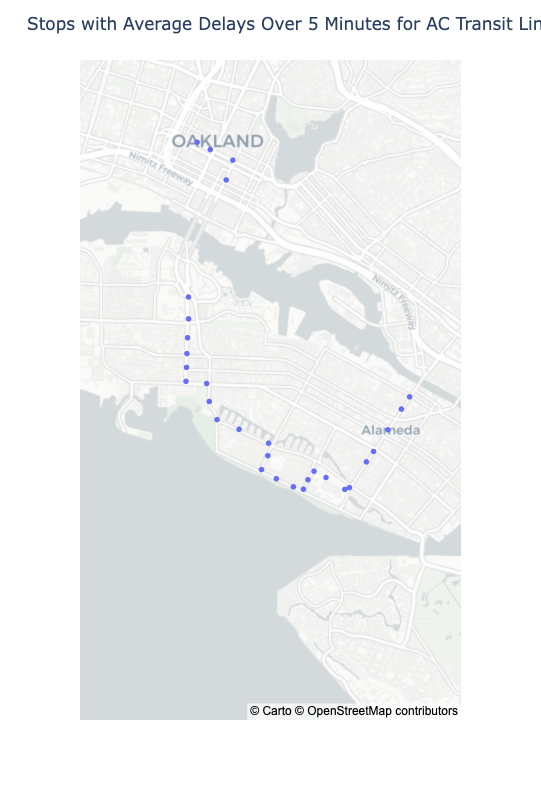

In [68]:
map_20

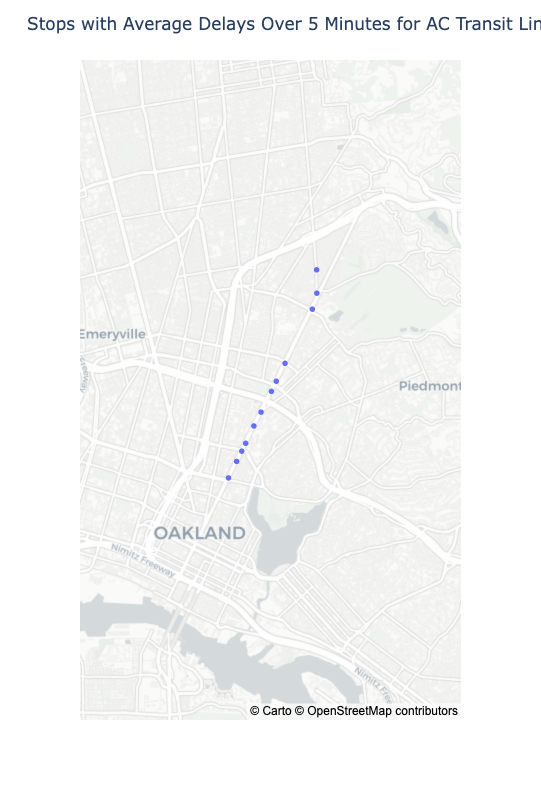

In [69]:
map_51A